In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt
from matplotlib.cm import ScalarMappable
import matplotlib.colors as colors
import datetime as dt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
%matplotlib inline

In [157]:
!pwd
!ls

/home/ikoma/work/infection
R1_R3_all_mencho.csv
Untitled.ipynb
gadm36_JPN_2.shp
nara_pref_corona_infection.xls
nara_pref_corona_infection.xlsx
nara_pref_corona_infection_20210907.xls
nara_pref_pop.xls
osaka
osaka_pref_corona_infection_20210829.xls
osaka_pref_pop.xls
関西感染者ヒートマップ.ipynb


### 奈良県患者発生データ

In [159]:
df = pd.read_excel("./nara_pref_corona_infection_20210907.xls", header=1)
df.head()

,No,全国地方公共団体コード,都道府県名,公表_年月日,発症_年月日,患者_居住地,患者_年代,患者_性別,発表時の状態,備考
0,1,290009,奈良県,2020-01-28,NaN,奈良県内,60代,男性,軽症,NaN
1,2,290009,奈良県,2020-03-06,NaN,奈良市,60代,男性,軽症,NaN
2,3,290009,奈良県,2020-03-06,NaN,奈良市,70代,女性,無症状,NaN
3,4,290009,奈良県,2020-03-06,NaN,奈良市,60代,男性,無症状,NaN
4,5,290009,奈良県,2020-03-09,NaN,郡山保健所管内,30代,男性,軽症,NaN


In [160]:
df=df[1:]

In [161]:
df.tail()

,No,全国地方公共団体コード,都道府県名,公表_年月日,発症_年月日,患者_居住地,患者_年代,患者_性別,発表時の状態,備考
14402,14403,290009,奈良県,2021-09-06,NaN,奈良市,20代,女性,無症状,NaN
14403,14404,290009,奈良県,2021-09-06,NaN,奈良市,60代,女性,無症状,NaN
14404,14405,290009,奈良県,2021-09-06,2021-09-03 00:00:00,奈良市,10代,男性,軽症,NaN
14405,14406,290009,奈良県,2021-09-06,2021-09-02 00:00:00,奈良市,30代,女性,軽症,NaN
14406,14407,290009,奈良県,2021-09-06,NaN,奈良市,40代,男性,無症状,NaN


In [162]:
iDf = df[['患者_居住地', 'No']].groupby(['患者_居住地']).count()
iDf = iDf.rename(columns={'No':'感染者数'})[['感染者数']]
iDf.loc['川上村'] = {'感染者数':0}        # 川上村、野迫川村は現状患者が発生していないため、レコードが存在しないので追加
iDf.loc['野迫川村'] = {'感染者数':0}


In [163]:
iDf

,感染者数
患者_居住地,
三宅町,52
三郷町,292
上北山村,2
上牧町,234
下北山村,2
下市町,16
中和保健所管内,8
五條市,183
兵庫県,4


In [164]:

wiDf = df[(df['公表_年月日'] >=dt.datetime(2021,8,31)) & (df['公表_年月日'] < dt.datetime(2021,9,6))]
wiDf = wiDf[['患者_居住地', 'No']].groupby(['患者_居住地']).count()
wiDf = wiDf.rename(columns={'No':'感染者数'})[['感染者数']]
#for i in wiDf.iterrows():
for i in iDf.index:
    if i in wiDf.index:
        continue
    else:
        print(i)
        wiDf.loc[i] = {'感染者数':0}
        
#    if wiDf[i['患者_居住地'] is NaN]:
#        wiDf[i['患者_居住地']] = 0

上北山村
下北山村
下市町
中和保健所管内
兵庫県
十津川村
和歌山市
和歌山県内
大阪市
大阪府
大阪府内
天川村
宮城県
御杖村
木津川市
東吉野村
調査中
郡山保健所管内
黒滝村
川上村
野迫川村


In [165]:
wiDf.tail()

,感染者数
患者_居住地,
調査中,0
郡山保健所管内,0
黒滝村,0
川上村,0
野迫川村,0


### 奈良県人口データ

In [166]:
naraPopDf = pd.read_excel("./nara_pref_pop.xls", header=1)

In [167]:
naraPopDf = naraPopDf.rename(columns={'　　　　　　　　　　　　推　計　人　口　　　　　　　　　(人)':'推計人口'})
naraPopDf = naraPopDf[['市町村名', '推計人口']][3:]

### 奈良県10万人当たり患者発生数

In [168]:
naraMergedDf = pd.merge(iDf, naraPopDf, left_on='患者_居住地', right_on='市町村名')
naraWMergedDf = pd.merge(wiDf, naraPopDf, left_on='患者_居住地', right_on='市町村名')

In [169]:
naraMergedDf['10万人当り感染者数(累計)'] = naraMergedDf['感染者数'] /naraMergedDf['推計人口'] * 100000
naraWMergedDf['10万人当り感染者数(週間)'] = naraWMergedDf['感染者数'] /naraWMergedDf['推計人口'] * 100000

In [170]:
naraWMergedDf

,感染者数,市町村名,推計人口,10万人当り感染者数(週間)
0,4,三宅町,6477,61.757
1,8,三郷町,23192,34.4947
2,15,上牧町,21001,71.4252
3,22,五條市,27288,80.6215
4,2,吉野町,6030,33.1675
5,63,大和郡山市,83771,75.205
6,77,大和高田市,60598,127.067
7,6,大淀町,16250,36.9231
8,33,天理市,63779,51.7412
9,302,奈良市,351839,85.8347


In [171]:
jpnShp2 = gpd.read_file('/home/ikoma/work/geopandas/gadm36_JPN_shp/gadm36_JPN_2.shp')
naraDf = jpnShp2[jpnShp2['NL_NAME_1'] == "奈良県"]

In [172]:
combAccumDf = naraDf.merge(naraMergedDf,left_on='NL_NAME_2',right_on='市町村名',how='left') # データの結合
combWklyDf = naraDf.merge(naraWMergedDf, left_on='NL_NAME_2', right_on='市町村名', how='left')

In [173]:
combAccumDf.head()

,GID_0,NAME_0,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry,感染者数,市町村名,推計人口,10万人当り感染者数(累計)
0,JPN,Japan,JPN.28_1,Nara,奈良県,JPN.28.1_1,Ando,None,安堵町,Machi,Town,None,None,"POLYGON ((135.77480 34.59470, 135.77240 34.593...",84,安堵町,7139,1176.64
1,JPN,Japan,JPN.28_1,Nara,奈良県,JPN.28.2_1,Asuka,None,明日香村,Mura,Village,None,None,"POLYGON ((135.86667 34.44322, 135.86606 34.442...",31,明日香村,5199,596.269
2,JPN,Japan,JPN.28_1,Nara,奈良県,JPN.28.3_1,Gojō,None,五條市,Shi,City,None,None,"POLYGON ((135.84712 34.26777, 135.84448 34.265...",183,五條市,27288,670.624
3,JPN,Japan,JPN.28_1,Nara,奈良県,JPN.28.4_1,Gose,None,御所市,Machi,Town,None,JP.NR.GS,"POLYGON ((135.67705 34.40035, 135.67731 34.409...",206,御所市,24086,855.269
4,JPN,Japan,JPN.28_1,Nara,奈良県,JPN.28.5_1,Heguri,None,平群町,Machi,Town,None,None,"POLYGON ((135.72159 34.64159, 135.72227 34.637...",157,平群町,18079,868.411


/usr/local/lib/python3.6/site-packages/geopandas/plotting.py:898: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(patches, categories, **legend_kwds)
/usr/local/lib/python3.6/site-packages/geopandas/plotting.py:898: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(patches, categories, **legend_kwds)


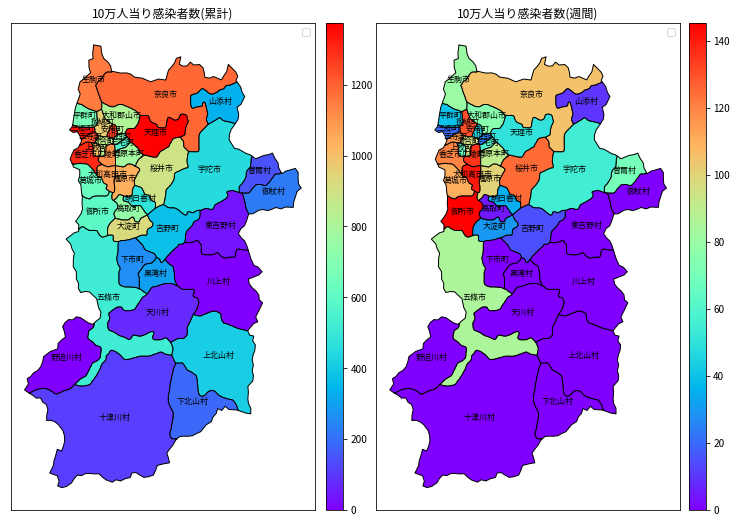

In [175]:


fig, axes = plt.subplots(nrows=1, ncols=2,sharex=False,sharey=True,figsize=(12, 12))

combAccumDf.apply(lambda x: axes[0].annotate(text=x.NL_NAME_2, xy=x.geometry.centroid.coords[0],
                                          ha='center', color = 'black', size = 8),axis=1)
im0 = combAccumDf.plot(column='10万人当り感染者数(累計)', cmap = 'rainbow', edgecolors='black', ax = axes[0],
                   legend=True,legend_kwds={'labels':"10万人当り感染者数(累計)"})
axes[0].set_title("10万人当り感染者数(累計)")

combWklyDf.apply(lambda x: axes[1].annotate(text=x.NL_NAME_2, xy=x.geometry.centroid.coords[0],
                                           ha='center', color='black', size=8),axis=1)
im1 = combWklyDf.plot(column='10万人当り感染者数(週間)', cmap= 'rainbow', edgecolors='black', ax=axes[1],
                   legend=True, legend_kwds={'labels':"10万人当り感染者数(週間)"})
axes[1].set_title("10万人当り感染者数(週間)")
#plt.title('10万人当り感染者数', fontsize=16)

axes[0].set_xticks([])
axes[0].set_yticks([])
axes[1].set_xticks([])
axes[1].set_yticks([])

axpos0 = axes[0].get_position()
axpos1 = axes[1].get_position()
cbar_ax0 = fig.add_axes([0.49, axpos0.y0, 0.02, axpos0.height])
cbar_ax1 = fig.add_axes([0.91, axpos1.y0, 0.02, axpos1.height])
norm0 = colors.Normalize(vmin=combAccumDf['10万人当り感染者数(累計)'].min(),
                         vmax=combAccumDf['10万人当り感染者数(累計)'].max())
norm1 = colors.Normalize(vmin=combWklyDf['10万人当り感染者数(週間)'].min(),
                         vmax=combWklyDf['10万人当り感染者数(週間)'].max())
mappable0 = ScalarMappable(cmap='rainbow',norm=norm0)
mappable1 = ScalarMappable(cmap='rainbow',norm=norm1)
mappable0._A = []
mappable1._A = []
fig.colorbar(mappable0, cax=cbar_ax0)
fig.colorbar(mappable1, cax=cbar_ax1)


plt.show()

fig.savefig("/home/ikoma/work/infection-narapref-accum-20210907.png")

### 大阪府患者発生データ

In [177]:
#days = ['0823', '0824', '0825', '0826', '0827', '0828', '0829']
#headers = [65, 69, 58, 67, 59, 63, 53]
days = ['0901', '0902', '0903', '0904', '0905', '0906', '0907']
headers = [74, 76, 63, 66, 58, 67, 76]
df = []
df1 = []
df2 = []
df3 = []

for i, d in enumerate(days):
    print(i)
    df.append(pd.read_excel("./osaka/osaka_pref_corona_infection_2021"+ d + ".xls", sheet_name="概要1～5", header=headers[i]))
    df[i] = df[i][:22]
    df1.append(df[i][['市町村', '発生者数', '累計']])
    df2.append(df[i][['市町村.1', '発生者数.1', '累計.1']])
    df2[i] = df2[i].rename(columns={'市町村.1': '市町村', '発生者数.1': '発生者数', '累計.1': '累計'})

    df3.append(pd.concat([df1[i],df2[i]]))
    

wkDf = pd.concat([df3[i] for i in range(7)]).groupby('市町村').agg({'発生者数': np.sum, '累計': max})

#df = pd.read_excel("./osaka_pref_corona_infection_20210829.xls", sheet_name="概要1～5", header=53)
#df = df[:22]
#df1 = df[['市町村', '発生者数', '累計']]
#df2 = df[['市町村.1', '発生者数.1', '累計.1']]
#df2 = df2.rename(columns={'市町村.1': '市町村', '発生者数.1': '発生者数', '累計.1': '累計'})
#
#df3 = pd.concat([df1,df2])

0
1
2
3
4
5
6


In [178]:
#print(df3[6])
print(wkDf)

         発生者数       累計
市町村                   
交野市     102.0   1087.0
八尾市     395.0   4942.0
千早赤阪村     4.0     35.0
吹田市     506.0   6206.0
和泉市     176.0   2711.0
四條畷市     61.0    906.0
堺市      937.0  12448.0
大東市     173.0   2438.0
大阪市    6395.0  79768.0
大阪府外    381.0   5079.0
大阪狭山市    43.0    839.0
太子町       2.0    104.0
守口市     202.0   2973.0
富田林市     90.0   1617.0
寝屋川市    289.0   4049.0
岬町        2.0    110.0
岸和田市    269.0   3105.0
島本町      28.0    366.0
忠岡町      26.0    231.0
摂津市     170.0   1581.0
東大阪市    909.0  11095.0
松原市     186.0   2151.0
枚方市     504.0   5813.0
柏原市     108.0   1053.0
池田市     113.0   1602.0
河内長野市    86.0   1104.0
河南町       7.0    145.0
泉佐野市     74.0   1118.0
泉南市      49.0    665.0
泉大津市    106.0   1255.0
熊取町      22.0    506.0
田尻町       4.0     80.0
箕面市     163.0   1938.0
羽曳野市    134.0   1709.0
能勢町       0.0     77.0
茨木市     381.0   4304.0
藤井寺市     79.0   1027.0
豊中市     530.0   6833.0
豊能町       4.0    169.0
貝塚市      83.0   1113.0
門真市     269.0   2609.0
阪南市      35

### 大阪府人口データ

In [179]:
osakaPopDf = pd.read_excel("./osaka_pref_pop.xls", header=2)
osakaPopDf = osakaPopDf.rename(columns={'Unnamed: 1':'市区町村', '人          口':'人口'})[['市区町村', '人口']]
osakaPopDf = pd.concat([osakaPopDf[22:23], osakaPopDf[47:48], osakaPopDf[56:107]]).dropna(how='any')

In [180]:
osakaPopDf

,市区町村,人口
22,大阪市,2756239
47,堺市,823029
56,岸和田市,189286
57,豊中市,401323
58,池田市,104982
59,吹田市,388189
60,泉大津市,74036
61,高槻市,352374
62,貝塚市,83444
63,守口市,142642


### 大阪府10万人当り感染者数

In [181]:
osakaMergedDf = pd.merge(wkDf, osakaPopDf, left_on='市町村', right_on='市区町村')
osakaMergedDf['10万人当り感染者数(累計)'] = osakaMergedDf['累計'] /osakaMergedDf['人口'] * 100000
osakaMergedDf['10万人当り感染者数(週間)'] = osakaMergedDf['発生者数'] /osakaMergedDf['人口'] * 100000

In [182]:
osakaMergedDf[:]

,発生者数,累計,市区町村,人口,10万人当り感染者数(累計),10万人当り感染者数(週間)
0,102.0,1087.0,交野市,74751,1454.16,136.453
1,395.0,4942.0,八尾市,263538,1875.25,149.884
2,4.0,35.0,千早赤阪村,4831,724.488,82.7986
3,506.0,6206.0,吹田市,388189,1598.71,130.349
4,176.0,2711.0,和泉市,184008,1473.31,95.648
5,61.0,906.0,四條畷市,54853,1651.69,111.206
6,937.0,12448.0,堺市,823029,1512.46,113.848
7,173.0,2438.0,大東市,118371,2059.63,146.151
8,6395.0,79768.0,大阪市,2756239,2894.09,232.019
9,43.0,839.0,大阪狭山市,58288,1439.4,73.7716


In [183]:
jpnShp2 = gpd.read_file('/home/ikoma/work/geopandas/gadm36_JPN_shp/gadm36_JPN_2.shp')
osakaDf = jpnShp2[jpnShp2['NL_NAME_1'] == "大阪府"]
osakaDf = osakaDf.replace('四条畷市', '四條畷市')

In [184]:
osakaCombAccumDf = osakaDf.merge(osakaMergedDf,left_on='NL_NAME_2',right_on='市区町村',how='left') # データの結合

/usr/local/lib/python3.6/site-packages/geopandas/plotting.py:898: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(patches, categories, **legend_kwds)
/usr/local/lib/python3.6/site-packages/geopandas/plotting.py:898: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(patches, categories, **legend_kwds)


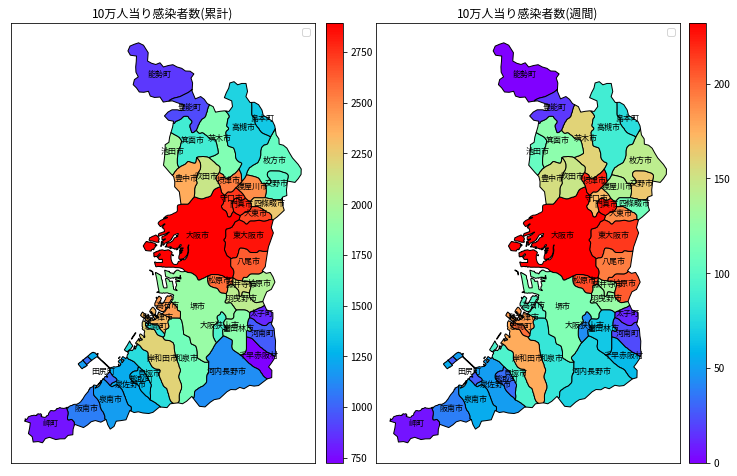

In [185]:

fig, axes = plt.subplots(nrows=1, ncols=2,sharex=False,sharey=True,figsize=(12, 12))

osakaCombAccumDf.apply(lambda x: axes[0].annotate(text=x.NL_NAME_2, xy=x.geometry.centroid.coords[0],
                                          ha='center', color = 'black', size = 8),axis=1)
im0 = osakaCombAccumDf.plot(column='10万人当り感染者数(累計)', cmap = 'rainbow', edgecolors='black', ax = axes[0],
                   legend=True,legend_kwds={'labels':"10万人当り感染者数(累計)"})
axes[0].set_title("10万人当り感染者数(累計)")

osakaCombAccumDf.apply(lambda x: axes[1].annotate(text=x.NL_NAME_2, xy=x.geometry.centroid.coords[0],
                                           ha='center', color='black', size=8),axis=1)
im1 = osakaCombAccumDf.plot(column='10万人当り感染者数(週間)', cmap= 'rainbow', edgecolors='black', ax=axes[1],
                   legend=True, legend_kwds={'labels':"10万人当り感染者数(週間)"})
axes[1].set_title("10万人当り感染者数(週間)")
#plt.title('10万人当り感染者数', fontsize=16)

axes[0].set_xticks([])
axes[0].set_yticks([])
axes[1].set_xticks([])
axes[1].set_yticks([])

axpos0 = axes[0].get_position()
axpos1 = axes[1].get_position()
cbar_ax0 = fig.add_axes([0.49, axpos0.y0, 0.02, axpos0.height])
cbar_ax1 = fig.add_axes([0.91, axpos1.y0, 0.02, axpos1.height])
norm0 = colors.Normalize(vmin=osakaCombAccumDf['10万人当り感染者数(累計)'].min(),
                         vmax=osakaCombAccumDf['10万人当り感染者数(累計)'].max())
norm1 = colors.Normalize(vmin=osakaCombAccumDf['10万人当り感染者数(週間)'].min(),
                         vmax=osakaCombAccumDf['10万人当り感染者数(週間)'].max())
mappable0 = ScalarMappable(cmap='rainbow',norm=norm0)
mappable1 = ScalarMappable(cmap='rainbow',norm=norm1)
mappable0._A = []
mappable1._A = []
fig.colorbar(mappable0, cax=cbar_ax0)
fig.colorbar(mappable1, cax=cbar_ax1)


plt.show()

fig.savefig("/home/ikoma/work/infection-osakapref-accum-20210907.png")

四条畷市データ欠損？ -> 四條畷vs四条畷問題が原因。四條畷が正解だが、gadmが四条畷を使用

大阪府のデータは週間ではなく1日分->wkDfで1週間分集計

### 奈良県および大阪府のデータをマージ

In [186]:
jpnShp2 = gpd.read_file('/home/ikoma/work/geopandas/gadm36_JPN_shp/gadm36_JPN_2.shp')
naraOsakaDf = jpnShp2[(jpnShp2['NL_NAME_1'] == "奈良県") | (jpnShp2['NL_NAME_1'] == "大阪府")]
naraOsakaDf = naraOsakaDf.replace('四条畷市', '四條畷市')

In [187]:
naraDf = pd.merge(naraMergedDf, naraWMergedDf, on='市町村名').rename(columns={'市町村名': '市区町村'})
naraDf = naraDf.loc[:,['市区町村', '10万人当り感染者数(累計)', '10万人当り感染者数(週間)']]
osakaDf = osakaMergedDf.loc[:,['市区町村', '10万人当り感染者数(累計)', '10万人当り感染者数(週間)']]

naraOsakaMergedDf = pd.concat([naraDf, osakaDf])

In [188]:
naraOsakaMergedDf

,市区町村,10万人当り感染者数(累計),10万人当り感染者数(週間)
0,三宅町,802.841,61.757
1,三郷町,1259.05,34.4947
2,上北山村,485.437,0
3,上牧町,1114.23,71.4252
4,下北山村,274.348,0
...,...,...,...
38,貝塚市,1333.83,99.4679
39,門真市,2192.09,226.014
40,阪南市,1093.76,69.1003
41,高槻市,1254.07,98.7587


In [189]:
osakaDf.head()

,市区町村,10万人当り感染者数(累計),10万人当り感染者数(週間)
0,交野市,1454.16,136.453
1,八尾市,1875.25,149.884
2,千早赤阪村,724.488,82.7986
3,吹田市,1598.71,130.349
4,和泉市,1473.31,95.648


In [190]:
naraOsakaMergedDf = naraOsakaDf.merge(naraOsakaMergedDf,left_on='NL_NAME_2',right_on='市区町村',how='left')

/usr/local/lib/python3.6/site-packages/geopandas/plotting.py:898: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(patches, categories, **legend_kwds)
/usr/local/lib/python3.6/site-packages/geopandas/plotting.py:898: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(patches, categories, **legend_kwds)


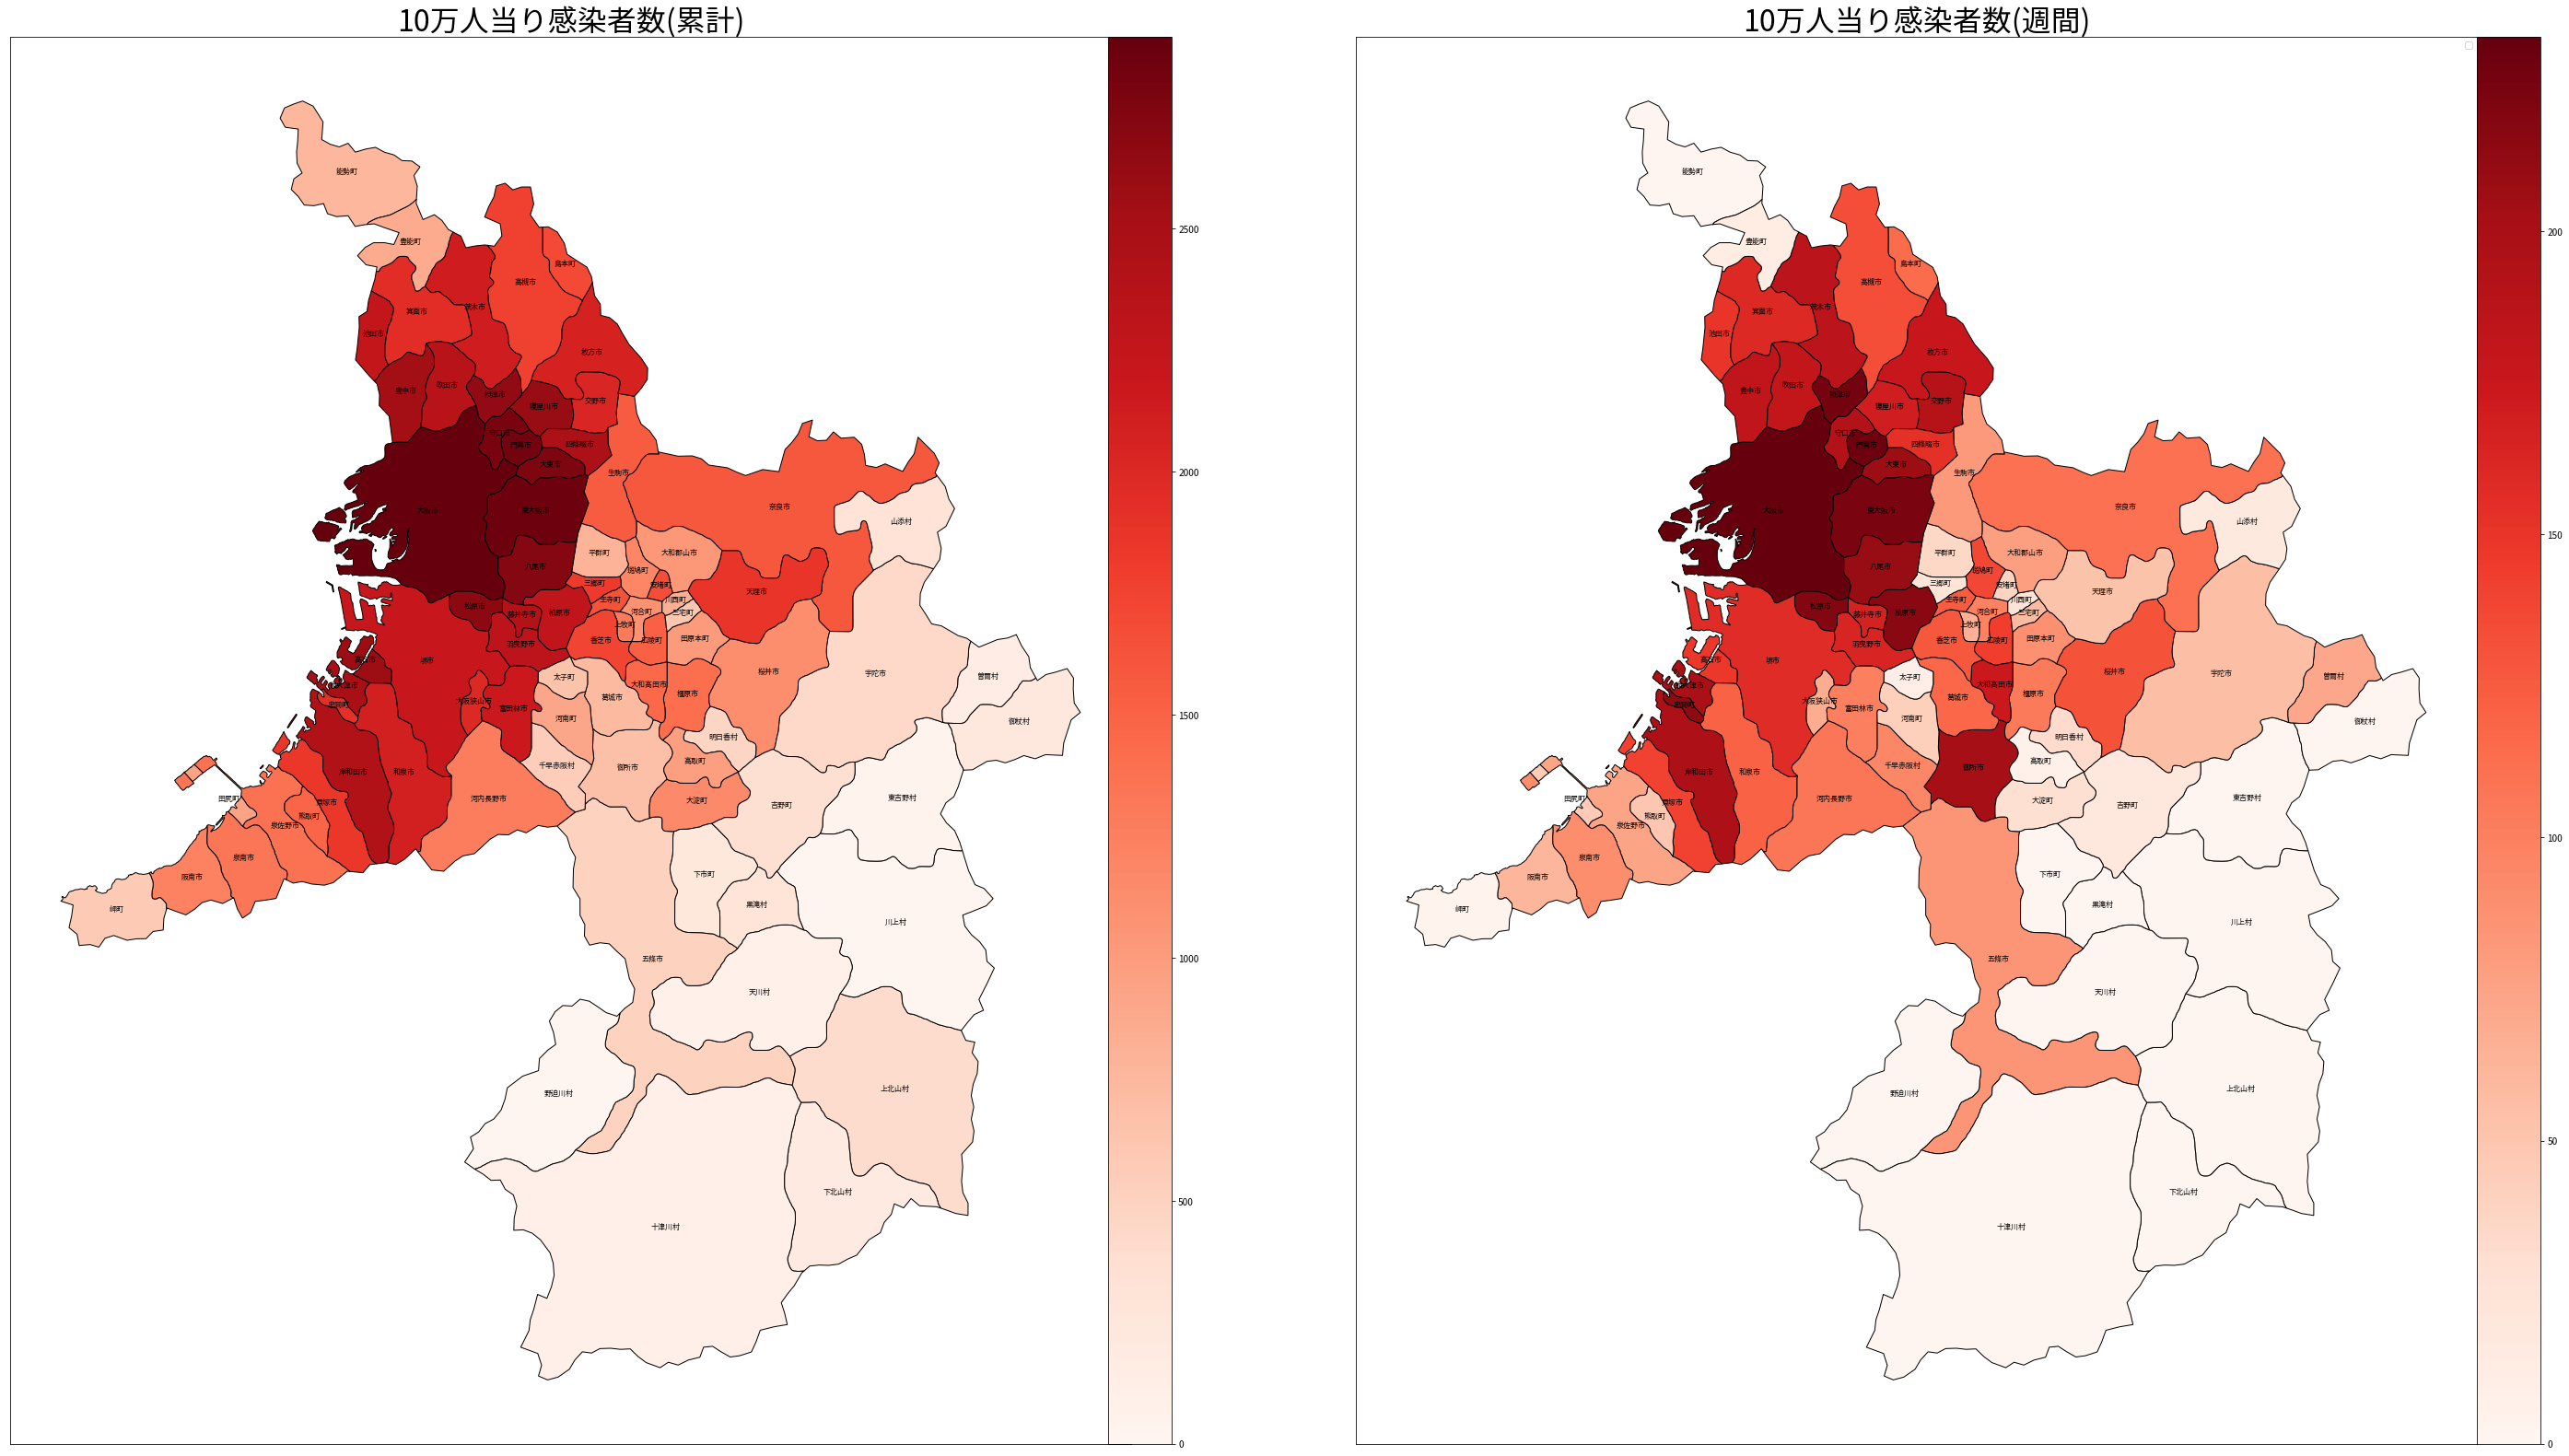

In [191]:
titlefontsize=32
colormap='Reds'             # 'hot', rainbow', 'seismic'


fig, axes = plt.subplots(nrows=1, ncols=2,sharex=False,sharey=True,figsize=(48, 48))

naraOsakaMergedDf.apply(lambda x: axes[0].annotate(text=x.NL_NAME_2, xy=x.geometry.centroid.coords[0],
                                          ha='center', color = 'black', size = 8),axis=1)
im0 = naraOsakaMergedDf.plot(column='10万人当り感染者数(累計)', cmap = colormap, edgecolors='black', ax = axes[0],
                   legend=True,legend_kwds={'labels':"10万人当り感染者数(累計)"})
axes[0].set_title("10万人当り感染者数(累計)", fontsize=titlefontsize)

naraOsakaMergedDf.apply(lambda x: axes[1].annotate(text=x.NL_NAME_2, xy=x.geometry.centroid.coords[0],
                                           ha='center', color='black', size=8),axis=1)
im1 = naraOsakaMergedDf.plot(column='10万人当り感染者数(週間)', cmap= colormap, edgecolors='black', ax=axes[1],
                   legend=True, legend_kwds={'labels':"10万人当り感染者数(週間)"})
axes[1].set_title("10万人当り感染者数(週間)",fontsize=titlefontsize)
#plt.title('10万人当り感染者数', fontsize=16)

axes[0].set_xticks([])
axes[0].set_yticks([])
axes[1].set_xticks([])
axes[1].set_yticks([])

axpos0 = axes[0].get_position()
axpos1 = axes[1].get_position()
cbar_ax0 = fig.add_axes([0.47, axpos0.y0, 0.02, axpos0.height])
cbar_ax1 = fig.add_axes([0.90, axpos1.y0, 0.02, axpos1.height])
norm0 = colors.Normalize(vmin=naraOsakaMergedDf['10万人当り感染者数(累計)'].min(),
                         vmax=naraOsakaMergedDf['10万人当り感染者数(累計)'].max())
norm1 = colors.Normalize(vmin=naraOsakaMergedDf['10万人当り感染者数(週間)'].min(),
                         vmax=naraOsakaMergedDf['10万人当り感染者数(週間)'].max())

mappable0 = ScalarMappable(cmap=colormap,norm=norm0)
mappable1 = ScalarMappable(cmap=colormap,norm=norm1)
mappable0._A = []
mappable1._A = []
fig.colorbar(mappable0, cax=cbar_ax0)
fig.colorbar(mappable1, cax=cbar_ax1)


plt.show()

fig.savefig("/home/ikoma/work/infection-nara-osaka-20210907.png")

In [192]:
osakaDf[:]

,市区町村,10万人当り感染者数(累計),10万人当り感染者数(週間)
0,交野市,1454.16,136.453
1,八尾市,1875.25,149.884
2,千早赤阪村,724.488,82.7986
3,吹田市,1598.71,130.349
4,和泉市,1473.31,95.648
5,四條畷市,1651.69,111.206
6,堺市,1512.46,113.848
7,大東市,2059.63,146.151
8,大阪市,2894.09,232.019
9,大阪狭山市,1439.4,73.7716


In [193]:
jpnShp2.head()

,GID_0,NAME_0,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
0,JPN,Japan,JPN.1_1,Aichi,愛知県,JPN.1.1_1,Agui,None,阿久比町,Machi,Town,None,None,"POLYGON ((136.88028 34.91983, 136.88237 34.921..."
1,JPN,Japan,JPN.1_1,Aichi,愛知県,JPN.1.2_1,Aisai,None,愛西市,Shi,City,None,None,"POLYGON ((136.70439 35.11997, 136.69835 35.122..."
2,JPN,Japan,JPN.1_1,Aichi,愛知県,JPN.1.3_1,Anjō,None,安城市,Shi,City,None,None,"POLYGON ((137.12468 34.99055, 137.12135 34.989..."
3,JPN,Japan,JPN.1_1,Aichi,愛知県,JPN.1.4_1,Chiryū,None,知立市,Shi,City,None,None,"POLYGON ((137.06000 34.97676, 137.05640 34.976..."
4,JPN,Japan,JPN.1_1,Aichi,愛知県,JPN.1.5_1,Chita,None,知多市,Shi,City,None,JP.AI.CG,"POLYGON ((136.82556 34.94000, 136.82584 34.940..."


### 人口密度マップ

##### 国土地理院面積調査データ

In [194]:
!wget http://www.gsi.go.jp/KOKUJYOHO/MENCHO/backnumber/R1_R3_all_mencho.csv


--2021-09-09 15:47:05--  http://www.gsi.go.jp/KOKUJYOHO/MENCHO/backnumber/R1_R3_all_mencho.csv
proxy.city.nara.nara.jp (proxy.city.nara.nara.jp) をDNSに問いあわせています... 10.255.1.80
proxy.city.nara.nara.jp (proxy.city.nara.nara.jp)|10.255.1.80|:8080 に接続しています... 接続しました。
Proxy による接続要求を送信しました、応答を待っています... 301 Moved Permanently
場所: https://www.gsi.go.jp/KOKUJYOHO/MENCHO/backnumber/R1_R3_all_mencho.csv [続く]
--2021-09-09 15:47:05--  https://www.gsi.go.jp/KOKUJYOHO/MENCHO/backnumber/R1_R3_all_mencho.csv
proxy.city.nara.nara.jp (proxy.city.nara.nara.jp)|10.255.1.80|:8080 に接続しています... 接続しました。
Proxy による接続要求を送信しました、応答を待っています... 200 OK
長さ: 219928 (215K) [text/csv]
`R1_R3_all_mencho.csv.1' に保存中

100%[======================================>] 219,928     --.-K/s 時間 0.08s     

2021-09-09 15:47:05 (2.70 MB/s) - `R1_R3_all_mencho.csv.1' へ保存完了 [219928/219928]



In [195]:
areaDf = pd.read_csv('R1_R3_all_mencho.csv', encoding='cp932', header=4)

areaDf.head()

,標準地域コード,都道府県,郡･支庁･振興局等,市区町村,令和3年4月1日(k㎡),令和3年4月1日備考,令和3年1月1日(k㎡),令和3年1月1日備考,令和2年10月1日(k㎡),令和2年10月1日備考,令和2年7月1日(k㎡),令和2年7月1日備考,令和2年1月1日(k㎡),令和2年1月1日備考,令和元年10月1日面積(k㎡),令和元年10月1日備考,令和元年7月面積(k㎡),令和元年7月備考
0,全国面積,NaN,NaN,NaN,377975.80,NaN,377975.61,NaN,377976.41,NaN,377976.94,NaN,377975.21,NaN,377975.24,NaN,377974.92,NaN
1,1000,北海道,NaN,NaN,83424.49,NaN,83424.44,NaN,83424.44,NaN,83424.45,NaN,83424.39,NaN,83424.39,NaN,83424.39,NaN
2,NaN,北海道(市部),NaN,NaN,18536.63,（参考値）,18536.61,（参考値）,18536.61,（参考値）,18536.61,（参考値）,18536.6,（参考値）,18536.6,（参考値）,18536.6,（参考値）
3,NaN,北海道(町村部),NaN,NaN,64828.84,（参考値）,64828.82,（参考値）,64828.82,（参考値）,64828.82,（参考値）,64828.77,（参考値）,64828.77,（参考値）,64828.77,（参考値）
4,1100,北海道,石狩振興局,札幌市,1121.26,NaN,1121.26,NaN,1121.26,NaN,1121.26,NaN,1121.26,NaN,1121.26,NaN,1121.26,NaN


In [196]:
areaNaraOsakaDf = areaDf[(areaDf['都道府県']=='奈良県') | (areaDf['都道府県']=='大阪府')]

In [197]:
areaNaraOsakaDf = areaNaraOsakaDf.rename(columns={'令和3年4月1日(k㎡)':'面積'})
areaNaraOsakaDf = areaNaraOsakaDf[['都道府県','市区町村', '面積']]
areaNaraOsakaDf.head()

,都道府県,市区町村,面積
1508,大阪府,NaN,1905.32
1511,大阪府,大阪市,225.32
1512,大阪府,(大阪市)都島区,6.08
1513,大阪府,(大阪市)福島区,4.67
1514,大阪府,(大阪市)此花区,19.28


In [198]:
nara2PopDf = naraPopDf.rename(columns={'市町村名':'市区町村', '推計人口':'人口'})
naraOsakaPopDf = pd.concat([osakaPopDf, nara2PopDf])

In [199]:
densityDf = naraOsakaPopDf.merge(areaNaraOsakaDf, left_on='市区町村', right_on='市区町村')
densityDf['人口密度'] = densityDf['人口'] / densityDf['面積']
densityDf.head()

,市区町村,人口,都道府県,面積,人口密度
0,大阪市,2756239,大阪府,225.32,12232.6
1,堺市,823029,大阪府,149.83,5493.09
2,岸和田市,189286,大阪府,72.72,2602.94
3,豊中市,401323,大阪府,36.39,11028.4
4,池田市,104982,大阪府,22.14,4741.73


In [200]:
corrDf = naraOsakaMergedDf.merge(densityDf,left_on='市区町村',right_on='市区町村',how='left')
corrDf.head()

,GID_0,NAME_0,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,...,CC_2,HASC_2,geometry,市区町村,10万人当り感染者数(累計),10万人当り感染者数(週間),人口,都道府県,面積,人口密度
0,JPN,Japan,JPN.28_1,Nara,奈良県,JPN.28.1_1,Ando,None,安堵町,Machi,...,None,None,"POLYGON ((135.77480 34.59470, 135.77240 34.593...",安堵町,1176.64,42.0227,7139,奈良県,4.31,1656.38
1,JPN,Japan,JPN.28_1,Nara,奈良県,JPN.28.2_1,Asuka,None,明日香村,Mura,...,None,None,"POLYGON ((135.86667 34.44322, 135.86606 34.442...",明日香村,596.269,38.4689,5199,奈良県,24.10,215.726
2,JPN,Japan,JPN.28_1,Nara,奈良県,JPN.28.3_1,Gojō,None,五條市,Shi,...,None,None,"POLYGON ((135.84712 34.26777, 135.84448 34.265...",五條市,670.624,80.6215,27288,奈良県,292.02,93.4457
3,JPN,Japan,JPN.28_1,Nara,奈良県,JPN.28.4_1,Gose,None,御所市,Machi,...,None,JP.NR.GS,"POLYGON ((135.67705 34.40035, 135.67731 34.409...",御所市,855.269,145.313,24086,奈良県,60.58,397.59
4,JPN,Japan,JPN.28_1,Nara,奈良県,JPN.28.5_1,Heguri,None,平群町,Machi,...,None,None,"POLYGON ((135.72159 34.64159, 135.72227 34.637...",平群町,868.411,38.719,18079,奈良県,23.90,756.444


In [201]:
corrOsakaDf = corrDf[corrDf['都道府県']=='大阪府']
corrNaraDf = corrDf[(corrDf['都道府県']=='奈良県') & (corrDf['市区町村'] != '奈良市')]
corrNaraCityDf = corrDf[(corrDf['都道府県']=='奈良県') & (corrDf['市区町村'] == '奈良市')]


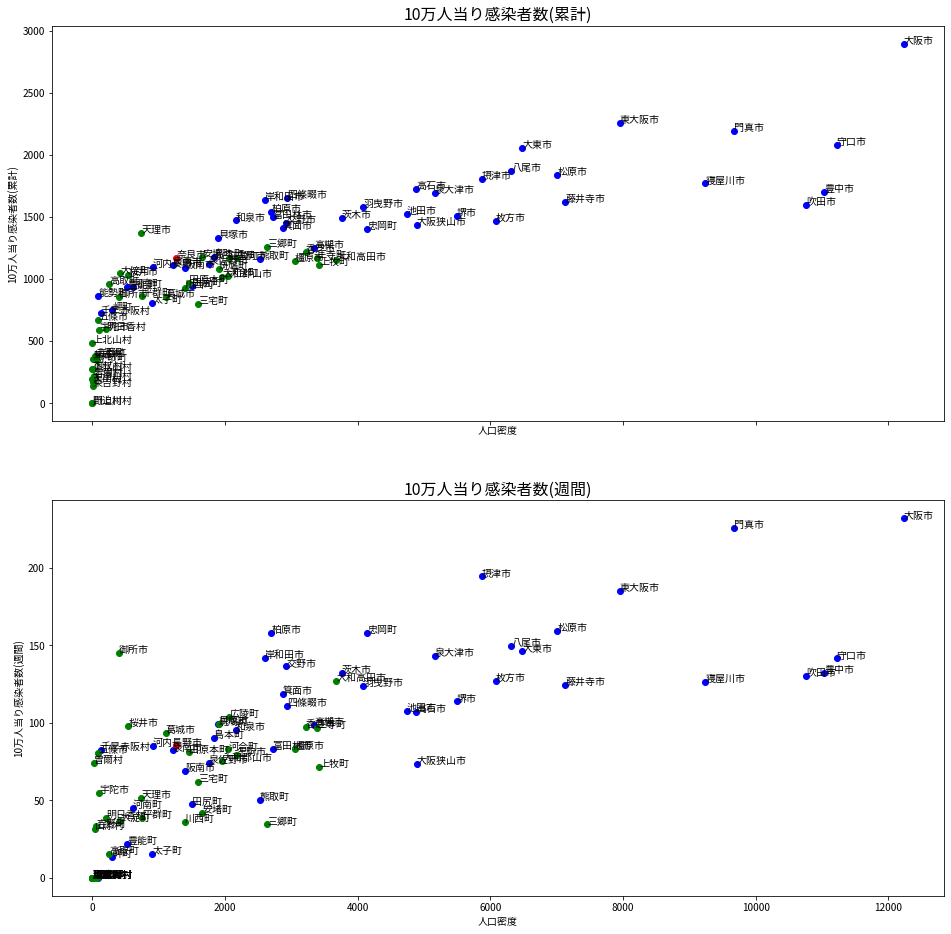

In [204]:
fig, axes = plt.subplots(nrows=2, ncols=1,sharex=True,sharey=False,figsize=(16, 16))

axes[0].scatter(corrOsakaDf['人口密度'], corrOsakaDf['10万人当り感染者数(累計)'], c='blue')
axes[0].scatter(corrNaraDf['人口密度'], corrNaraDf['10万人当り感染者数(累計)'], c='green')
axes[0].scatter(corrNaraCityDf['人口密度'], corrNaraCityDf['10万人当り感染者数(累計)'], c='red')

axes[1].scatter(corrOsakaDf['人口密度'], corrOsakaDf['10万人当り感染者数(週間)'], c='blue')
axes[1].scatter(corrNaraDf['人口密度'], corrNaraDf['10万人当り感染者数(週間)'], c='green')
axes[1].scatter(corrNaraCityDf['人口密度'], corrNaraCityDf['10万人当り感染者数(週間)'], c='red')

axes[0].set_title("10万人当り感染者数(累計)", fontsize=16)
axes[1].set_title("10万人当り感染者数(週間)", fontsize=16)
axes[0].set_xlabel('人口密度')
axes[1].set_xlabel('人口密度')
axes[0].set_ylabel('10万人当り感染者数(累計)')
axes[1].set_ylabel('10万人当り感染者数(週間)')

axes[0].text(corrNaraCityDf['人口密度'], corrNaraCityDf['10万人当り感染者数(累計)'], '奈良市')
for i, r in corrOsakaDf.iterrows():
#    if corrOsakaDf.at[i,'人口密度'] > 6000.0:
    axes[0].text(corrOsakaDf.at[i,'人口密度'], corrOsakaDf.at[i, '10万人当り感染者数(累計)'],
                    corrOsakaDf.at[i,'市区町村'])
    
    axes[1].text(corrOsakaDf.at[i,'人口密度'], corrOsakaDf.at[i, '10万人当り感染者数(週間)'],
                    corrOsakaDf.at[i,'市区町村'])
    

for i, r in corrNaraDf.iterrows():
    axes[0].text(corrNaraDf.at[i,'人口密度'], corrNaraDf.at[i, '10万人当り感染者数(累計)'],
                 corrNaraDf.at[i,'市区町村'])
    axes[1].text(corrNaraDf.at[i,'人口密度'], corrNaraDf.at[i, '10万人当り感染者数(週間)'],
                 corrNaraDf.at[i,'市区町村'])

fig.savefig("/home/ikoma/work/infection-density-corr-20210907.png")

plt.show()